In [1]:
import math
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.feature_selection

In [2]:
data_path = "./data/"
path_train = os.path.join(data_path, "train.csv")
path_test = os.path.join(data_path, "test.csv")

In [3]:
def load_data(path_train, path_test):
    data_train = pd.read_csv(path_train, skipinitialspace = True)
    data_test = pd.read_csv(path_test, skipinitialspace = True)
    return data_train, data_test

In [4]:
data_train, data_test = load_data(path_train, path_test)

In [5]:
data_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
label_dict = {'<=50K': 0, '>50K': 1}
data_train["income"] = data_train["income"].apply(lambda x: label_dict[x])

In [13]:
target_ratio = data_train[["workclass", "income"]].groupby(["workclass"]).mean()

In [28]:
data_train["workclass"] = data_train["workclass"].apply(lambda x: target_ratio["income"][x])

In [63]:
data_train["education_num"].value_counts().sort_index()

1        51
2       168
3       333
4       646
5       514
6       933
7      1175
8       433
9     10501
10     7291
11     1382
12     1067
13     5355
14     1723
15      576
16      413
Name: education_num, dtype: int64

In [62]:
data_train.groupby(["education_num", "education"])["age"].count().sort_index()

education_num  education   
1              Preschool          51
2              1st-4th           168
3              5th-6th           333
4              7th-8th           646
5              9th               514
6              10th              933
7              11th             1175
8              12th              433
9              HS-grad         10501
10             Some-college     7291
11             Assoc-voc        1382
12             Assoc-acdm       1067
13             Bachelors        5355
14             Masters          1723
15             Prof-school       576
16             Doctorate         413
Name: age, dtype: int64

In [69]:
data_train["capital_loss"].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital_loss, Length: 92, dtype: int64

In [70]:
data_train["capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital_gain, Length: 119, dtype: int64

In [71]:
data_train["hours_per_week"].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: hours_per_week, Length: 94, dtype: int64

In [65]:
#去除education，因為和education_num是同一個變數
#而education_num不用做normalization
num_cols = ["age", "fnlwgt", "capital_gain", "capital_loss", "hours_per_week"]
cat_cols = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country"]
order_cal_cols = ["education_num"]

# EDA - numerical columns

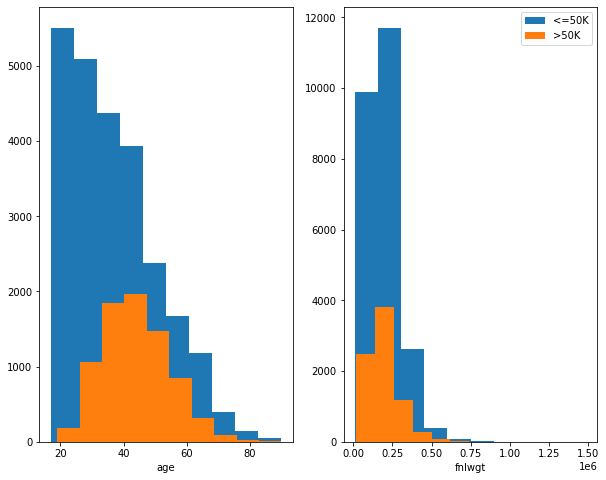

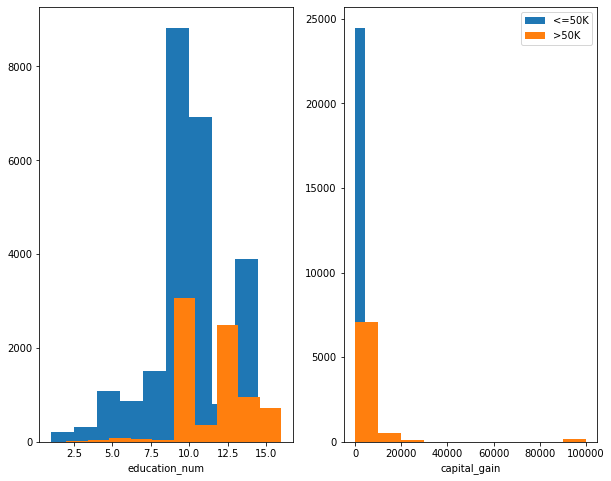

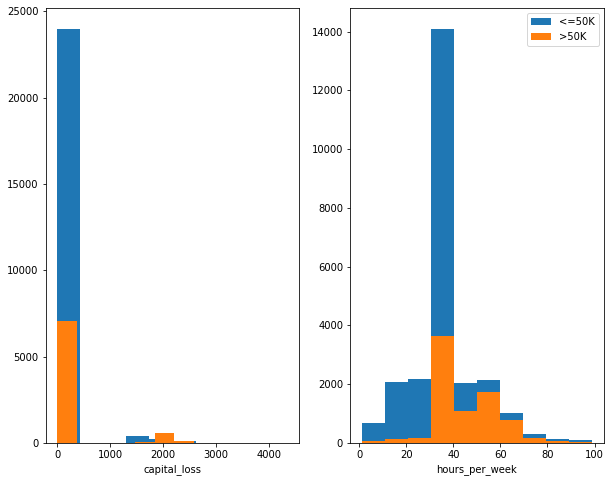

In [36]:
num_num_cols = len(num_cols)
for i in range(0, num_num_cols, 2):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,8))
    data_class_1 = data_train[data_train["income"] == "<=50K"]
    data_class_2 = data_train[data_train["income"] != "<=50K"]
    ax1.hist(data_class_1[num_cols[i]])
    ax1.hist(data_class_2[num_cols[i]])
    ax2.hist(data_class_1[num_cols[i+1]])
    ax2.hist(data_class_2[num_cols[i+1]])
    plt.legend(["<=50K", ">50K"])
    ax1.set_xlabel(num_cols[i])
    ax2.set_xlabel(num_cols[i+1])
    plt.show()

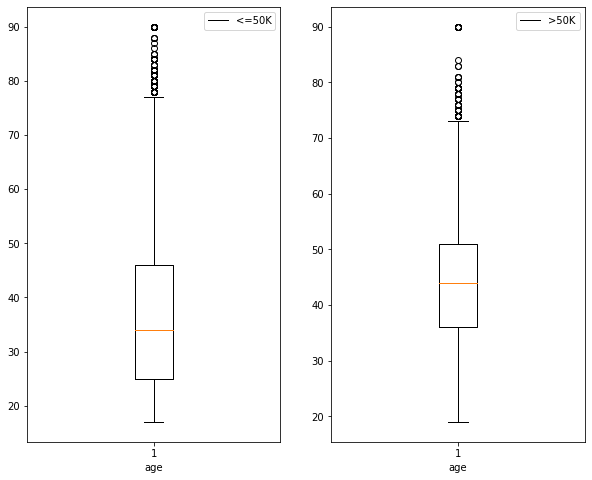

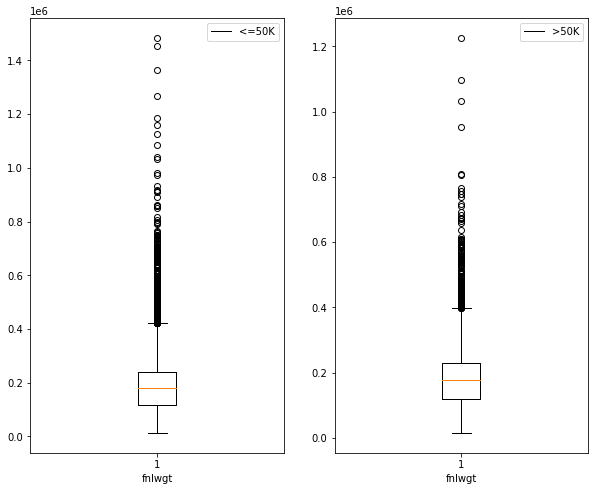

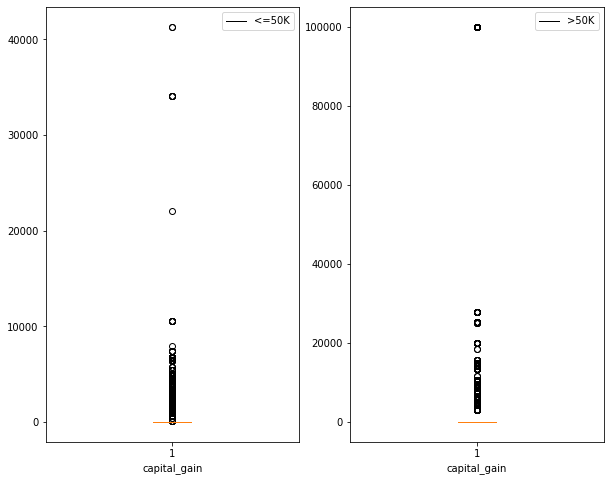

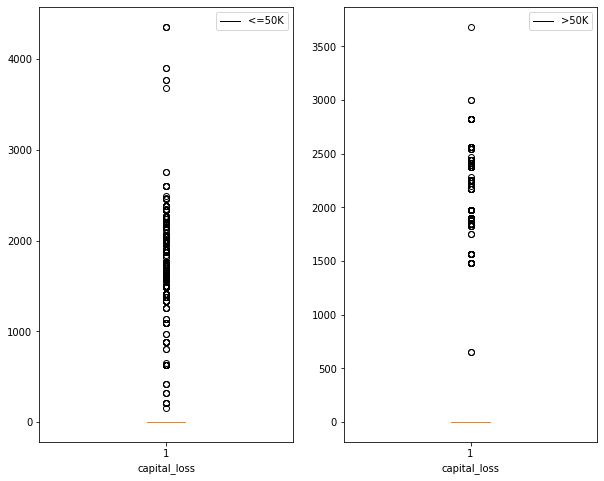

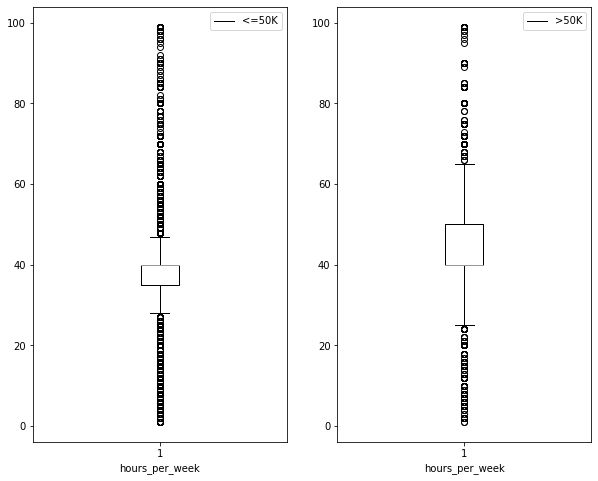

In [67]:
for i in range(len(num_cols)):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,8))
    data_class_1 = data_train[data_train["income"] == "<=50K"]
    data_class_2 = data_train[data_train["income"] != "<=50K"]
    ax1.boxplot(data_class_1[num_cols[i]])
    ax2.boxplot(data_class_2[num_cols[i]])
    ax1.legend(["<=50K"])
    ax2.legend([">50K"])
    ax1.set_xlabel(num_cols[i])
    ax2.set_xlabel(num_cols[i])
    plt.show()

In [ ]:
for i in range(len(num_cols)):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,8))
    data_class_1 = data_train[data_train["income"] == "<=50K"]
    data_class_2 = data_train[data_train["income"] != "<=50K"]
    ax1.boxplot(data_class_1[num_cols[i]])
    ax2.boxplot(data_class_2[num_cols[i]])
    ax1.legend(["<=50K"])
    ax2.legend([">50K"])
    ax1.set_xlabel(num_cols[i])
    ax2.set_xlabel(num_cols[i])
    plt.show()

# Group by different categories

In [79]:
encode_dict = {">50K":1, "<=50K":0}
data_train["income"] =  data_train["income"].apply(lambda x: encode_dict[x])

In [78]:
data_train.groupby(["education_num", "income"])["age"].count()

education_num  income
1              <=50K       51
2              <=50K      162
               >50K         6
3              <=50K      317
               >50K        16
4              <=50K      606
               >50K        40
5              <=50K      487
               >50K        27
6              <=50K      871
               >50K        62
7              <=50K     1115
               >50K        60
8              <=50K      400
               >50K        33
9              <=50K     8826
               >50K      1675
10             <=50K     5904
               >50K      1387
11             <=50K     1021
               >50K       361
12             <=50K      802
               >50K       265
13             <=50K     3134
               >50K      2221
14             <=50K      764
               >50K       959
15             <=50K      153
               >50K       423
16             <=50K      107
               >50K       306
Name: age, dtype: int64

In [120]:
print(len(data_train.groupby(["education_num"])["income"].mean()))
data_train.groupby(["education_num"])["income"].mean()

16


education_num
1     0.000000
2     0.035714
3     0.048048
4     0.061920
5     0.052529
6     0.066452
7     0.051064
8     0.076212
9     0.159509
10    0.190235
11    0.261216
12    0.248360
13    0.414753
14    0.556587
15    0.734375
16    0.740920
Name: income, dtype: float64

In [122]:
print(len(data_train.groupby(["workclass"])["income"].mean()))
print(data_train.groupby(["workclass"])["income"].mean().var())
data_train.groupby(["workclass"])["income"].mean()

9
0.032768717574832


workclass
?                   0.104031
Federal-gov         0.386458
Local-gov           0.294792
Never-worked        0.000000
Private             0.218673
Self-emp-inc        0.557348
Self-emp-not-inc    0.284927
State-gov           0.271957
Without-pay         0.000000
Name: income, dtype: float64

In [123]:
print(len(data_train.groupby(["marital_status"])["income"].mean()))
print(data_train.groupby(["marital_status"])["income"].mean().var())
print(data_train.groupby(["marital_status"])["income"].mean())

7
0.03197375866799135
marital_status
Divorced                 0.104209
Married-AF-spouse        0.434783
Married-civ-spouse       0.446848
Married-spouse-absent    0.081340
Never-married            0.045961
Separated                0.064390
Widowed                  0.085599
Name: income, dtype: float64


In [124]:
print(len(data_train.groupby(["occupation"])["income"].mean()))
print(data_train.groupby(["occupation"])["income"].mean().var())
print(data_train.groupby(["occupation"])["income"].mean())

15
0.02073436274865595
occupation
?                    0.103635
Adm-clerical         0.134483
Armed-Forces         0.111111
Craft-repair         0.226641
Exec-managerial      0.484014
Farming-fishing      0.115694
Handlers-cleaners    0.062774
Machine-op-inspct    0.124875
Other-service        0.041578
Priv-house-serv      0.006711
Prof-specialty       0.449034
Protective-serv      0.325116
Sales                0.269315
Tech-support         0.304957
Transport-moving     0.200376
Name: income, dtype: float64


In [125]:
print(len(data_train.groupby(["relationship"])["income"].mean()))
print(data_train.groupby(["relationship"])["income"].mean().var())
data_train.groupby(["relationship"])["income"].mean()

6
0.04524345854311061


relationship
Husband           0.448571
Not-in-family     0.103070
Other-relative    0.037717
Own-child         0.013220
Unmarried         0.063262
Wife              0.475128
Name: income, dtype: float64

In [126]:
print(len(data_train.groupby(["race"])["income"].mean()))
print(data_train.groupby(["race"])["income"].mean().var())
data_train.groupby(["race"])["income"].mean()

5
0.006907777748935863


race
Amer-Indian-Eskimo    0.115756
Asian-Pac-Islander    0.265640
Black                 0.123880
Other                 0.092251
White                 0.255860
Name: income, dtype: float64

In [89]:
data_train.groupby(["sex"])["income"].mean()

sex
Female    0.109461
Male      0.305737
Name: income, dtype: float64

In [127]:
print(len(data_train.groupby(["native_country"])["income"].mean()))
print(data_train.groupby(["native_country"])["income"].mean().var())
data_train.groupby(["native_country"])["income"].mean()

42
0.017000119708705623


native_country
?                             0.250429
Cambodia                      0.368421
Canada                        0.322314
China                         0.266667
Columbia                      0.033898
Cuba                          0.263158
Dominican-Republic            0.028571
Ecuador                       0.142857
El-Salvador                   0.084906
England                       0.333333
France                        0.413793
Germany                       0.321168
Greece                        0.275862
Guatemala                     0.046875
Haiti                         0.090909
Holand-Netherlands            0.000000
Honduras                      0.076923
Hong                          0.300000
Hungary                       0.230769
India                         0.400000
Iran                          0.418605
Ireland                       0.208333
Italy                         0.342466
Jamaica                       0.123457
Japan                         0.387097
Laos      

In [128]:
print(len(data_train.groupby(["education", "workclass"])["income"].mean()))
data_train.groupby(["education", "workclass"])["income"].mean()

117


education     workclass       
10th          ?                   0.020000
              Federal-gov         0.000000
              Local-gov           0.032258
              Never-worked        0.000000
              Private             0.067626
                                    ...   
Some-college  Private             0.181194
              Self-emp-inc        0.513274
              Self-emp-not-inc    0.220165
              State-gov           0.095385
              Without-pay         0.000000
Name: income, Length: 117, dtype: float64

In [103]:
print(data_train.groupby(["occupation", "sex"])["income"].mean().var())
data_train.groupby(["occupation", "sex"])["income"].mean()

0.02444375587945859


occupation         sex   
?                  Female    0.061831
                   Male      0.138723
Adm-clerical       Female    0.083563
                   Male      0.239254
Armed-Forces       Male      0.111111
Craft-repair       Female    0.090090
                   Male      0.234460
Exec-managerial    Female    0.241588
                   Male      0.580667
Farming-fishing    Female    0.030769
                   Male      0.121636
Handlers-cleaners  Female    0.024390
                   Male      0.067993
Machine-op-inspct  Female    0.036364
                   Male      0.158402
Other-service      Female    0.028333
                   Male      0.057525
Priv-house-serv    Female    0.007092
                   Male      0.000000
Prof-specialty     Female    0.254125
                   Male      0.561524
Protective-serv    Female    0.131579
                   Male      0.350785
Sales              Female    0.069675
                   Male      0.374948
Tech-support       Femal

In [104]:
print(data_train.groupby(["workclass", "sex"])["income"].mean().var())
data_train.groupby(["workclass", "sex"])["income"].mean()

0.030246389802265926


workclass         sex   
?                 Female    0.061979
                  Male      0.139418
Federal-gov       Female    0.177778
                  Male      0.488372
Local-gov         Female    0.184431
                  Male      0.368045
Never-worked      Female    0.000000
                  Male      0.000000
Private           Female    0.093653
                  Male      0.283525
Self-emp-inc      Female    0.303704
                  Male      0.592253
Self-emp-not-inc  Female    0.205514
                  Male      0.299720
State-gov         Female    0.139059
                  Male      0.352287
Without-pay       Female    0.000000
                  Male      0.000000
Name: income, dtype: float64

In [105]:
print(data_train.groupby(["relationship", "sex"])["income"].mean().var())
data_train.groupby(["relationship", "sex"])["income"].mean()

0.03820302999119889


relationship    sex   
Husband         Female    0.000000
                Male      0.448605
Not-in-family   Female    0.073290
                Male      0.129120
Other-relative  Female    0.032558
                Male      0.041742
Own-child       Female    0.011136
                Male      0.014878
Unmarried       Female    0.042200
                Male      0.133838
Wife            Female    0.475096
                Male      0.500000
Name: income, dtype: float64

In [111]:
data_train[(data_train["relationship"] == "Wife") & (data_train["sex"] == "Male")]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
575,29,Private,350162,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Male,0,0,40,United-States,1
27141,36,Private,74791,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Male,0,0,60,?,0


In [112]:
data_train[(data_train["relationship"] == "Husband") & (data_train["sex"] == "Female")]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
7109,34,Private,175878,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Female,0,0,40,United-States,0


In [129]:
print(len(data_train.groupby(["workclass", "occupation"])["income"].mean()))
print(data_train.groupby(["workclass", "occupation"])["income"].mean().var())
data_train.groupby(["workclass", "occupation"])["income"].mean()

83
0.032487315270670745


workclass    occupation       
?            ?                    0.104031
Federal-gov  Adm-clerical         0.318612
             Armed-Forces         0.111111
             Craft-repair         0.328125
             Exec-managerial      0.511111
                                    ...   
Without-pay  Farming-fishing      0.000000
             Handlers-cleaners    0.000000
             Machine-op-inspct    0.000000
             Other-service        0.000000
             Transport-moving     0.000000
Name: income, Length: 83, dtype: float64

In [131]:
print(len(data_train.groupby(["marital_status", "relationship"])["income"].mean()))
print(data_train.groupby(["marital_status", "relationship"])["income"].mean().var())
data_train.groupby(["marital_status", "relationship"])["income"].mean()

29
0.02301308431997292


marital_status         relationship  
Divorced               Not-in-family     0.128536
                       Other-relative    0.054545
                       Own-child         0.042683
                       Unmarried         0.083698
Married-AF-spouse      Husband           0.444444
                       Other-relative    0.000000
                       Own-child         0.000000
                       Wife              0.500000
Married-civ-spouse     Husband           0.448574
                       Not-in-family     0.235294
                       Other-relative    0.145161
                       Own-child         0.178947
                       Wife              0.474936
Married-spouse-absent  Not-in-family     0.118483
                       Other-relative    0.062500
                       Own-child         0.044444
                       Unmarried         0.038462
Never-married          Not-in-family     0.090523
                       Other-relative    0.013093
            

# Preprocess testing

In [100]:
keep_cat_cols  = ["workclass", "marital_status", "occupation", "relationship", "sex"]
data_cat = data_train[keep_cat_cols]

In [101]:
pd.get_dummies(data_cat)

,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital_status_Divorced,...,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,sex_Female,sex_Male
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
32557,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
32558,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
32559,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
